In [1]:
import pandas as pd
import numpy as np
import nltk
 
import matplotlib.pyplot as plt 
#import googletrans
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import random
from nltk.corpus import movie_reviews

import pickle 
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode

In [2]:
#!pip install googletrans

In [3]:
#from wordcloud import WordCloud, STOPWORDS

In [33]:
df=pd.read_csv('data_ryan.csv')

In [34]:
df.head(5)

,title,channel_title,desc,date,tags,liked,disliked,views
0,Easy DIY Science Experiment for Kids Rainbow S...,Ryan's World,Easy DIY Science Experiment for Kids Rainbow S...,2021-01-24T13:00:02Z,"[""Ryan's World"", 'Ryan ToysReview', 'science e...",1503,399,200970
1,Ryan play with Giant Soccer Ball and Learn abo...,Ryan's World,Ryan play with Giant Soccer Ball and Learn abo...,2021-01-23T13:00:32Z,"[""Ryan's World"", 'force', 'force and motion', ...",2434,626,331667
2,Ryan hides the Golden Egg from King Collectors...,Ryan's World,Ryan hides the Golden Egg from King Collectors...,2021-01-22T13:00:22Z,"[""Ryan's World"", 'Pretend play', 'Combo Panda'...",2469,605,332385
3,Dancing Corn Easy DIY Science Experiments for ...,Ryan's World,Dancing Corn Easy DIY Science Experiments for ...,2021-01-20T13:00:13Z,"[""Ryan's World"", 'Ryan ToysReview', 'dancing c...",7228,2360,1587332
4,Ryan does DIY Science Experiments with Emma an...,Ryan's World,Ryan does DIY Science Experiments with Emma an...,2021-01-18T13:00:29Z,"[""Ryan's World"", 'Ryan ToysReview', 'DIY scien...",16552,6395,4411698


In [35]:
df.shape

(1902, 8)

In [36]:
# tags wordcloud
tag_words = '' 
stopwords = set(STOPWORDS)
#print(stopwords)

In [37]:
# title wordcloud
title_words = ''

In [38]:
# iterate through the csv file 
for val in df.title: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    title_words += " ".join(tokens)+" "

In [39]:
val

'Kid playing with toys Lego Duplo Number Train'

In [40]:
wordcloud_title = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(title_words) 

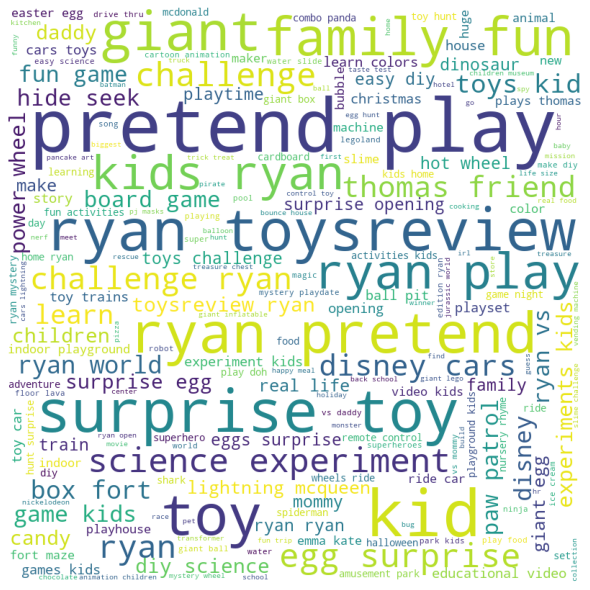

In [41]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_title) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [42]:
#word_data = df.title
#nltk_tokens = nltk.word_tokenize(word_data)  	

print(list(nltk.bigrams(df.tags))[:3])

[('["Ryan\'s World", \'Ryan ToysReview\', \'science experiments\', \'kids science experiments\', \'science experiments for kids\', \'easy DIY science experiments\', \'easy DIY science experiments for kids\', \'snowstorm in a jar\', \'rainbow science experiments\', \'oil and water experiments\', \'kids science video\']', '["Ryan\'s World", \'force\', \'force and motion\', \'learn about force\', \'what is a force\', \'push or pull\', \'science video\', \'kids science video\', \'kids learning video\', \'science preschooler\', \'kids video\', \'educational video\', \'educational video for kids\', \'kids educational video\', \'Kindergarten learning video\']'), ('["Ryan\'s World", \'force\', \'force and motion\', \'learn about force\', \'what is a force\', \'push or pull\', \'science video\', \'kids science video\', \'kids learning video\', \'science preschooler\', \'kids video\', \'educational video\', \'educational video for kids\', \'kids educational video\', \'Kindergarten learning video

In [43]:
print(list(nltk.bigrams(df.title))[:3])

[('Easy DIY Science Experiment for Kids Rainbow Snowstorm in a Jar!!!', 'Ryan play with Giant Soccer Ball and Learn about Force and Motion for kids!!'), ('Ryan play with Giant Soccer Ball and Learn about Force and Motion for kids!!', 'Ryan hides the Golden Egg from King Collectors with Combo Panda!!!'), ('Ryan hides the Golden Egg from King Collectors with Combo Panda!!!', 'Dancing Corn Easy DIY Science Experiments for kids to do at home!!')]


In [44]:
print(title_words[:20])

easy diy science exp


In [45]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
tokenized_title=word_tokenize(title_words)
print(tokenized_title[:10])

['easy', 'diy', 'science', 'experiment', 'for', 'kids', 'rainbow', 'snowstorm', 'in', 'a']


In [47]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_title)
print(fdist)

<FreqDist with 2117 samples and 22250 outcomes>


In [48]:
fdist.most_common(5)

[('!', 2509), ('ryan', 1076), ('with', 813), ('kids', 620), ('for', 618)]

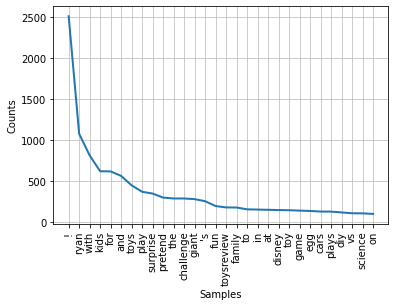

In [49]:
# Frequency Distribution Plot - TITLE
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

TITLE COLUMNS

In [21]:
type(df.title[0])

str

In [22]:
df.title[0]

'Easy DIY Science Experiment for Kids Rainbow Snowstorm in a Jar!!!'

In [50]:
#words = 'word1 word2 word3 word4, word5'
replace_list = ['Kid', '!',"Ryan's", 'Ryan', 'kids','Pretend', 'pretend', 'playing','play', 'DIY', 'challenge','toys', 'toy', 'Toys', 'Challenge','surprise','Surprise','Giant']

def remove_multiple_strings(cur_string, replace_list):
  for cur_word in replace_list:
    cur_string_2 = cur_string.replace(cur_word, '')
  return cur_string_2


In [51]:
df['filtered_title']=np.empty((len(df), 0)).tolist()

In [52]:
df.head(5)

,title,channel_title,desc,date,tags,liked,disliked,views,filtered_title
0,Easy DIY Science Experiment for Kids Rainbow S...,Ryan's World,Easy DIY Science Experiment for Kids Rainbow S...,2021-01-24T13:00:02Z,"[""Ryan's World"", 'Ryan ToysReview', 'science e...",1503,399,200970,[]
1,Ryan play with Giant Soccer Ball and Learn abo...,Ryan's World,Ryan play with Giant Soccer Ball and Learn abo...,2021-01-23T13:00:32Z,"[""Ryan's World"", 'force', 'force and motion', ...",2434,626,331667,[]
2,Ryan hides the Golden Egg from King Collectors...,Ryan's World,Ryan hides the Golden Egg from King Collectors...,2021-01-22T13:00:22Z,"[""Ryan's World"", 'Pretend play', 'Combo Panda'...",2469,605,332385,[]
3,Dancing Corn Easy DIY Science Experiments for ...,Ryan's World,Dancing Corn Easy DIY Science Experiments for ...,2021-01-20T13:00:13Z,"[""Ryan's World"", 'Ryan ToysReview', 'dancing c...",7228,2360,1587332,[]
4,Ryan does DIY Science Experiments with Emma an...,Ryan's World,Ryan does DIY Science Experiments with Emma an...,2021-01-18T13:00:29Z,"[""Ryan's World"", 'Ryan ToysReview', 'DIY scien...",16552,6395,4411698,[]


In [53]:
#removing stopwords from TITLE
#for i in range(len(df.title)):
    # typecaste each val to string 
#    row = df.title[i]
#    df.filtered_title[i]=remove_multiple_strings(row, replace_list)

In [54]:
import re

In [55]:
#re.sub(r'|'.join(map(re.escape, replace_list)), '', row)

for i in range(len(df.title)):
    # typecaste each val to string 
    row = df.title[i]
    #df.filtered_title[i]=remove_multiple_strings(row, replace_list)
    df.filtered_title[i]=re.sub(r'|'.join(map(re.escape, replace_list)), '', row)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [56]:
df.filtered_title[0]

'Easy  Science Experiment for s Rainbow Snowstorm in a Jar'

In [57]:
df.head(5)

,title,channel_title,desc,date,tags,liked,disliked,views,filtered_title
0,Easy DIY Science Experiment for Kids Rainbow S...,Ryan's World,Easy DIY Science Experiment for Kids Rainbow S...,2021-01-24T13:00:02Z,"[""Ryan's World"", 'Ryan ToysReview', 'science e...",1503,399,200970,Easy Science Experiment for s Rainbow Snowsto...
1,Ryan play with Giant Soccer Ball and Learn abo...,Ryan's World,Ryan play with Giant Soccer Ball and Learn abo...,2021-01-23T13:00:32Z,"[""Ryan's World"", 'force', 'force and motion', ...",2434,626,331667,with Soccer Ball and Learn about Force and ...
2,Ryan hides the Golden Egg from King Collectors...,Ryan's World,Ryan hides the Golden Egg from King Collectors...,2021-01-22T13:00:22Z,"[""Ryan's World"", 'Pretend play', 'Combo Panda'...",2469,605,332385,hides the Golden Egg from King Collectors wit...
3,Dancing Corn Easy DIY Science Experiments for ...,Ryan's World,Dancing Corn Easy DIY Science Experiments for ...,2021-01-20T13:00:13Z,"[""Ryan's World"", 'Ryan ToysReview', 'dancing c...",7228,2360,1587332,Dancing Corn Easy Science Experiments for to...
4,Ryan does DIY Science Experiments with Emma an...,Ryan's World,Ryan does DIY Science Experiments with Emma an...,2021-01-18T13:00:29Z,"[""Ryan's World"", 'Ryan ToysReview', 'DIY scien...",16552,6395,4411698,does Science Experiments with Emma and Kate ...


In [58]:
df.tail(5)

,title,channel_title,desc,date,tags,liked,disliked,views,filtered_title
1897,Kid playing with toys Vtech Go Go smart wheels...,Ryan's World,Go! Go! Smart Wheels Train Station Playset is ...,2015-03-31T14:29:33Z,"['go go smart wheels', 'vtech', 'playset', 'To...",10796,3999,15935578,with Vtech Go Go smart wheels
1898,Ryan Opens easter eggs surprise thomas the tan...,Ryan's World,Ryan wants to go on an easter egg hunt but the...,2015-03-29T00:31:36Z,"['easter eggs hunt', 'easter egg surprise', 't...",34235,16401,56056406,Opens easter eggs thomas the tank engine tra...
1899,Ryan Opens Easter eggs Surprise 2015,Ryan's World,Pick of the Week Toy 3 Toy Easter Eggs special...,2015-03-24T00:28:18Z,"['easter eggs', 'easter eggs open', 'easter eg...",22552,10313,31422470,Opens Easter eggs 2015
1900,Kid playing with Remote control toys Batman Im...,Ryan's World,Kid playing with Remote control toys Batman Im...,2015-03-21T02:24:19Z,"['Imaginext', 'Fisher-Price (Business Operatio...",29362,8697,26642954,with Remote control Batman Imaginext Batbot
1901,Kid playing with toys Lego Duplo Number Train,Ryan's World,Kid playing with toys Lego Duplo Number Train ...,2015-03-17T05:56:08Z,"['Lego Duplo', 'Toy (Interest)', 'LEGO (Intere...",52492,21988,51178757,with Lego Duplo Number Train


In [59]:
df.to_csv('data_ryan_2.csv',index=False )